In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"employees.csv")
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [3]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='mixed')

In [4]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services


In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [7]:
df['First Name'] = df['First Name'].astype('string')
df['Gender'] = df['Gender'].astype('string')
df['Senior Management'] = df['Senior Management'].astype('bool')
df['Team'] = df['Team'].astype('string')

In [9]:
df.dtypes

First Name           string[python]
Gender               string[python]
Start Date           datetime64[ns]
Last Login Time              object
Salary                        int64
Bonus %                     float64
Senior Management              bool
Team                 string[python]
dtype: object

In [10]:
help(pd.Series.astype)

Help on function astype in module pandas.core.generic:

astype(self, dtype, copy: 'bool_t | None' = None, errors: 'IgnoreRaise' = 'raise') -> 'Self'
    Cast a pandas object to a specified dtype ``dtype``.

    Parameters
    ----------
    dtype : str, data type, Series or Mapping of column name -> data type
        Use a str, numpy.dtype, pandas.ExtensionDtype or Python type to
        cast entire pandas object to the same type. Alternatively, use a
        mapping, e.g. {col: dtype, ...}, where col is a column label and dtype is
        a numpy.dtype or Python type to cast one or more of the DataFrame's
        columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for provided dtype.

        - ``raise`` : allo

In [11]:
columns = {'First Name':'First_Name',
           'Start Date':'Start_date',
           'Last Login Time':'Last_Login_Time',
           'Bonus %':'Bonus_perct',
           'Senior Management':'Senior_Management'}
df.rename(columns = columns, inplace=True)

In [12]:
df.columns

Index(['First_Name', 'Gender', 'Start_date', 'Last_Login_Time', 'Salary',
       'Bonus_perct', 'Senior_Management', 'Team'],
      dtype='object')

In [13]:
df.head(3)

,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,<NA>
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance


In [14]:
df.nunique()

First_Name           200
Gender                 2
Start_date           972
Last_Login_Time      720
Salary               995
Bonus_perct          971
Senior_Management      2
Team                  10
dtype: int64

### Handling Missing Values:

isnull() notnull() dropna() fillna() bfill() fill() replace() interpolate()

In [15]:
df.isnull().sum()

First_Name            67
Gender               145
Start_date             0
Last_Login_Time        0
Salary                 0
Bonus_perct            0
Senior_Management      0
Team                  43
dtype: int64

In [16]:
df['Gender'].fillna("No Gender", inplace=True)

In [17]:
df.isnull().sum()

First_Name           67
Gender                0
Start_date            0
Last_Login_Time       0
Salary                0
Bonus_perct           0
Senior_Management     0
Team                 43
dtype: int64

In [18]:
df['Team'].value_counts()

Team
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: count, dtype: Int64

In [19]:
df = df.dropna(axis=0, how='any')

In [20]:
df.isnull().sum()

First_Name           0
Gender               0
Start_date           0
Last_Login_Time      0
Salary               0
Bonus_perct          0
Senior_Management    0
Team                 0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First_Name         899 non-null    string        
 1   Gender             899 non-null    string        
 2   Start_date         899 non-null    datetime64[ns]
 3   Last_Login_Time    899 non-null    object        
 4   Salary             899 non-null    int64         
 5   Bonus_perct        899 non-null    float64       
 6   Senior_Management  899 non-null    bool          
 7   Team               899 non-null    string        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1), string(3)
memory usage: 57.1+ KB


In [22]:
df= df.reset_index()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              899 non-null    int64         
 1   First_Name         899 non-null    string        
 2   Gender             899 non-null    string        
 3   Start_date         899 non-null    datetime64[ns]
 4   Last_Login_Time    899 non-null    object        
 5   Salary             899 non-null    int64         
 6   Bonus_perct        899 non-null    float64       
 7   Senior_Management  899 non-null    bool          
 8   Team               899 non-null    string        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(1), string(3)
memory usage: 57.2+ KB


### Data Visualization

In [24]:
import warnings
warnings.filterwarnings('ignore')

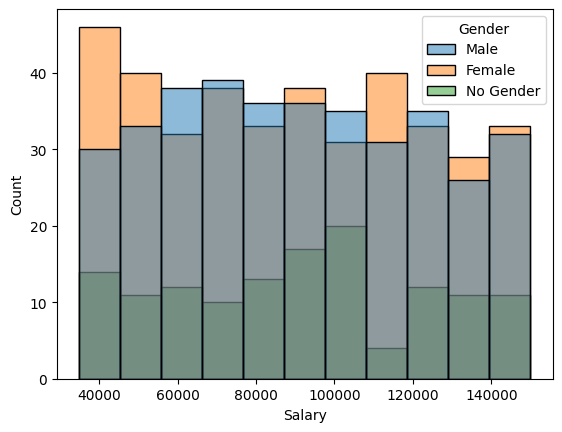

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Salary', hue='Gender', data=df)
plt.show()

<Axes: xlabel='Salary'>

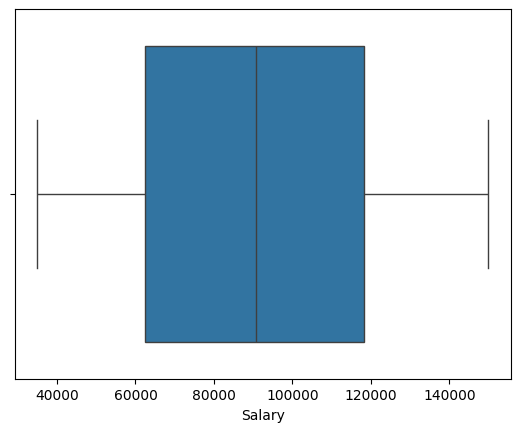

In [27]:
sns.boxplot(x='Salary', data=df)

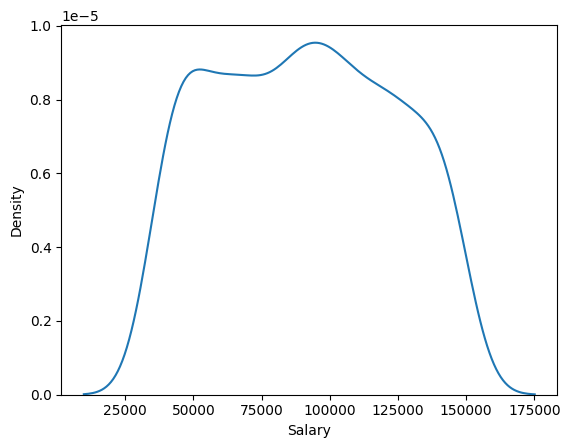

In [28]:
sns.kdeplot(x="Salary", data=df)
plt.show()

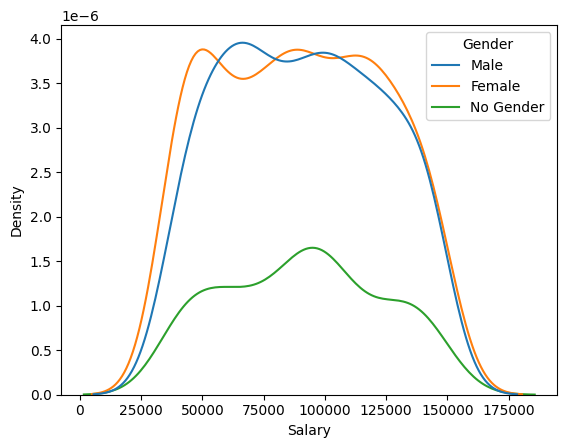

In [30]:
sns.kdeplot(x="Salary", hue="Gender", data=df)
plt.show()

### Relationship of variables

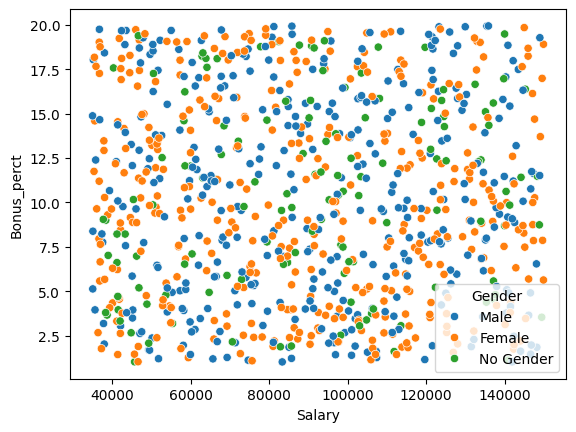

In [31]:
sns.scatterplot(x="Salary", y="Bonus_perct", data=df, hue="Gender")
plt.show()

<Axes: xlabel='Gender', ylabel='Bonus_perct'>

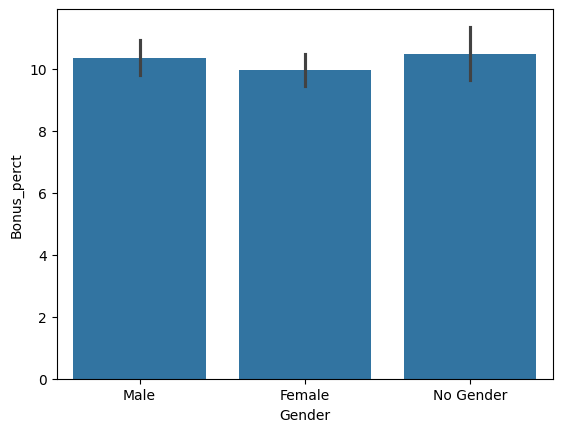

In [32]:
sns.barplot(x="Gender", y="Bonus_perct", data=df) 

In [36]:
bonus19=df[df['Bonus_perct']>19].sort_values(['Start_date'])
len(bonus19)

54

<Axes: xlabel='Start_date', ylabel='Bonus_perct'>

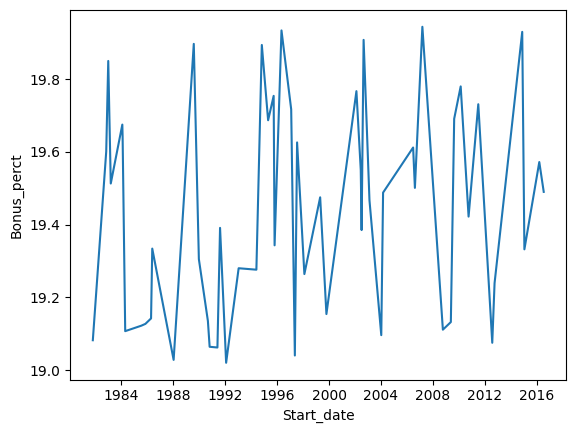

In [38]:
sns.lineplot(x='Start_date', y='Bonus_perct', data=bonus19)